# EDA To Prediction (DieTanic)

타이타닉의 침몰은 역사상 가장 악명 높은 난파선 중 하나이다. 1912년 4월 15일, 첫 항해 중, 타이타닉호는 빙산과 충돌한 후 가라앉았고, 승객과 승무원 2224명 중 1502명이 사망했다. 그래서 DieTanic이라는 이름이 붙었어요. 이것은 이 세상 누구도 잊을 수 없는 매우 잊을 수 없는 재앙입니다.

타이타닉을 만드는데 약 750만 달러가 소요되었고 충돌로 인해 바다 밑으로 가라앉았습니다. Titanic Dataset은 초보자들이 데이터 과학의 여정을 시작하고 Kaggle에서 대회에 참가할 수 있는 매우 좋은 데이터 세트이다.

이 노트북의 목표는 예측 모델링 문제에서 워크플로우가 어떤지를 설명하는 것입니다. 우리가 피처들을 체크하는 방법, 새로운 피처 및 일부 기계 학습 개념을 추가하는 방법을. 난 노트북이 초보자도 이해할 수 있도록 최대한 기본을 지키려고 노력했습니다.

노트북이 마음에 드시고 도움이 되었다고 생각하신다면..UPVOTE를 많이 올려주세요. 동기부여가 될 거예요.

# Contents of the Notebook:

### Part1: Exploratory Data Analysis(EDA):
1) Analysis of the features.

2) Finding any relations or trends considering multiple features.

### Part2: Feature Engineering and Data Cleaning:
1) Adding any few features.

2) Removing redundant features.

3) Converting features into suitable form for modeling.

### Part3: Predictive Modeling
1) Running Basic Algorithms.

2) Cross Validation.

3) Ensembling.

4) Important Features Extraction.


# Part1: Exploratory Data Analysis(EDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('../input/titanic/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum() # checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Age, Cabin, Embarked** 는 **null values**를 가진다.
난 저것들을 고칠 것.

**How many Survived??**

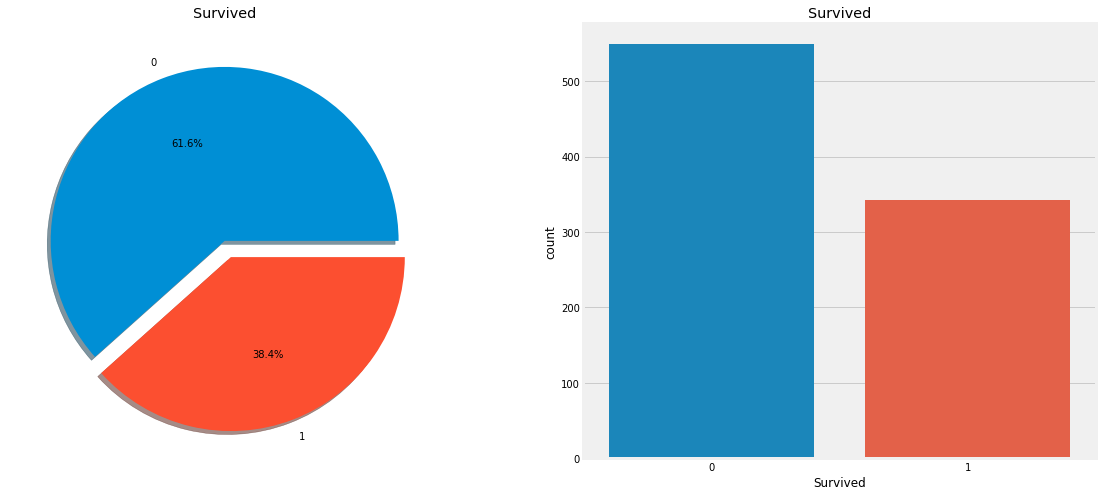

In [5]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

# matplotlib.axes.Axes.pie
# explode=[0,0.1] : pie 차트 조각의 틈 간
# autopct='%1.1f%%' : 차트 조각 내부 표시할 문자열 포맷 지정
# shadow=True : 그림자 여부
data['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')

plt.show()

타이타닉 사고에서 살아남은 승객이 많지 않다는 것은 명백하다.

training set의 891명의 탑승자 중, 전체 training set에서 오직 38.4%만이 crash에서 살아남았다. 약 350명만이 살아남았다. 우리는 데이터에서 더 나은 통찰력을 얻고, 생존한 승객과 생존하지 못한 승객의 범주특성을 알아보기 위해 더 깊이 파고들 필요가 있다.

data set의 다양한 feature들을 이용하여 생존율을 확인하도록 하겠습니다. Some of the features being Sex, Port Of Embarcation, Age,etc.

First let us understand the different types of features.

<br>

## Types Of Features

### Categorical Features:
A categorical variable is one that has two or more categories and each value in that feature can be categorised by them. For example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such variables. They are also known as **Nominal Variables**.

**Categorical Features in the dataset: Sex, Embarked.**

### Ordinal Features:
An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values.(값 사이의 상대적 순서화 또는 정렬을 할 수 있음) For eg: If we have a feature like **Height** with values **Tall, Medium, Short**, then Height is a ordinal variable. Here we can have a relative sort in the variable.

**Ordinal Features in the dataset: PClass**

### Continous Feature:
A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.

**Continous Features in the dataset: Age**

<br>

## Analysing The Features

<br>

## Sex--> Categorical Feature

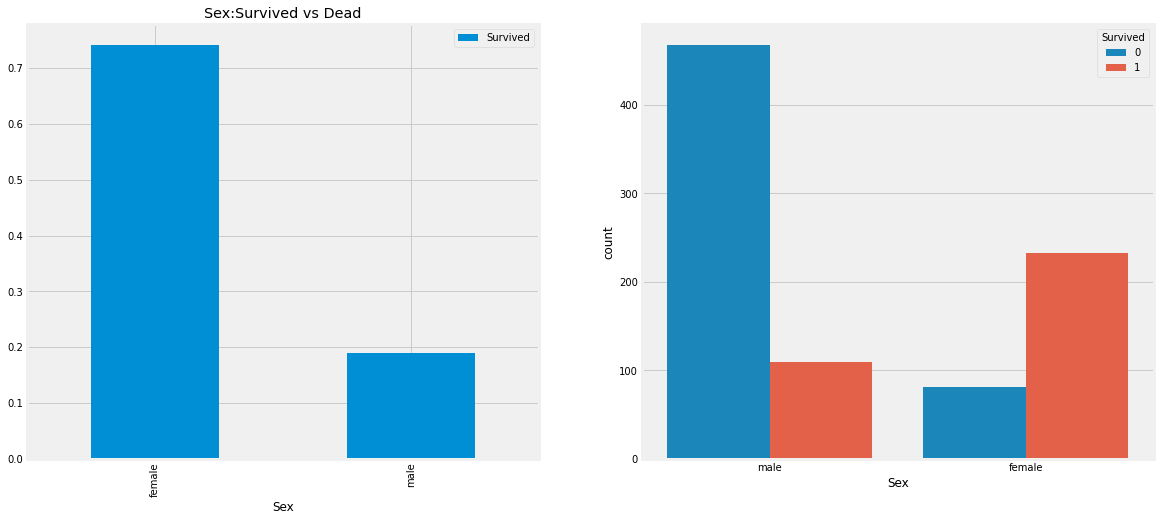

In [6]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[0].set_title('Sex:Survived vs Dead')

plt.show()

This looks interesting. The number of men on the ship is lot more than the number of women. Still the number of women saved is almost twice the number of males saved. The survival rates for a **women on the ship is around 75% while that for men in around 18-19%.**

This looks to be a **very important** feature for modeling. But is it the best?? Lets check other features.

흥미로운 결과 입니다. 남자 탑승객의 수가 여자 탑승객의 수보다 훨씬 많습니다.
그렇지만 여자 생존 탑승객의 수가 남자 생존 탑승객의 수보다 거의 두배 많습니다.
여성의 생존률은 약 75% 정도인데 반해 남자의 생존률은 18~19% 정도입니다.

때문에 성별은 모델링에 매우 중요한 feature일 것입니다.
하지만 이것이 최선일지 다른 feature들을 살펴보겠습니다.

<br>

## Pclass --> Ordinal Feature

In [7]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


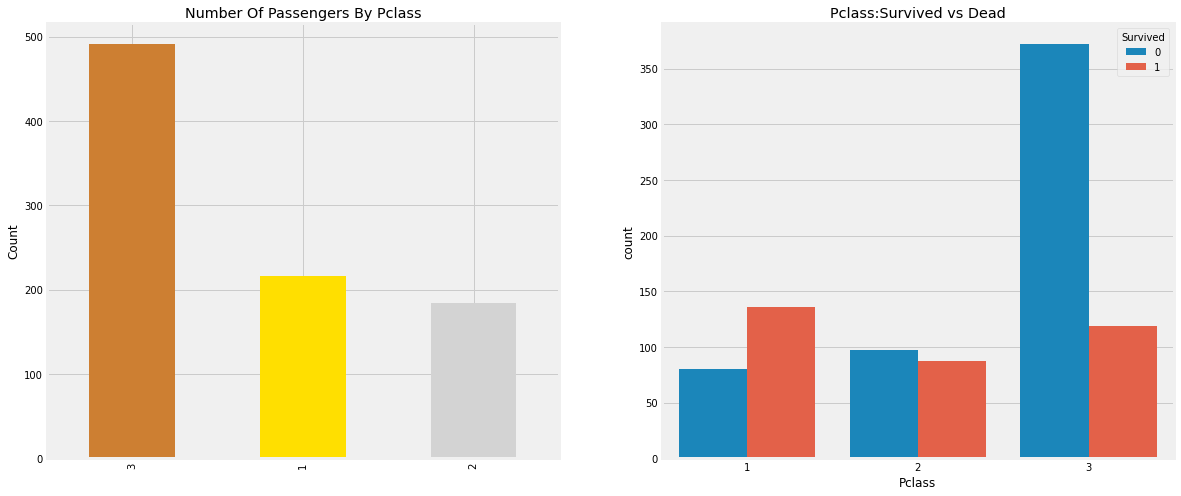

In [8]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

data['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')

plt.show()

People say **Money Can't Buy Everything.** But we can clearly see that Passenegers Of Pclass 1 were given a very high priority while rescue. Even though the number of Passengers in Pclass 3 were a lot higher, still the number of survival from them is very low, somewhere around **25%.**

For Pclass 1 survived is around **63%** while for Pclass2 is around **48%**. So money and status matters. Such a materialistic world.

Lets Dive in little bit more and check for other interesting observations. Lets check survival rate with **Sex and Pclass** Together.

돈으로 모든것을 살 수 없다고 흔히들 말하지만 Pclass 1 의 생존자가 구조 시에 매우 우선 순위에 있었던 것 같습니다.
Pclass 3의 탑승객 수가 훨씬 많았지만, 생존자 비율은 25% 정도로 매우 낮습니다.

Pclass 1의 생존률은 63%, Pclass 2의 생존률은 48% 정도입니다. 결국, 돈과 지위가 중요한 요소로 작용한 듯 합니다.

다른 흥미로운 점을 찾기 위해 더 들어가보겠습니다. 이번에는 Sex와 Pclass를 함께 두고 생존률을 체크해보겠습니다.

In [9]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

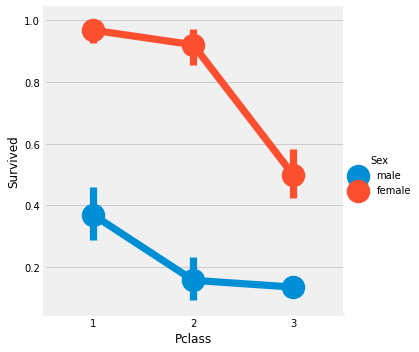

In [10]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show()

We use **FactorPlot** in this case, because they make the seperation of categorical values easy.

Looking at the **CrossTab** and the **FactorPlot**, we can easily infer that survival for **Women from Pclass1** is about **95-96%**, as only 3 out of 94 Women from Pclass1 died.

It is evident that irrespective of Pclass, Women were given first priority while rescue. Even Men from Pclass1 have a very low survival rate.

Looks like Pclass is also an important feature. Lets analyse other features.


이번 케이스에서는 Categorical Value를 쉽게 보기 위해 Factor Plot을 사용했습니다.

CrossTab과 FactorPlot을 보면 Pclass 1 여성 탑승객의 생존률이 95~96% 가량으로 사망자는 3명 정도만 있습니다.

그리고 Pclass와 무관하게, 여성이 구조에 있어서 우선 순위에 있었습니다. 남성의 경우 Pclass 1라도 생존률은 매우 낮습니다.

Pclass 또한 중요한 feature 로 보입니다. 다른 feature를 또 분석해보겠습니다.


<br>

## Age --> Continous Feature

In [11]:
print('Oldest Passenger was of:', data["Age"].max(), 'Years')
print('Youngest Passenger was of:', data["Age"].min(), 'Years')
print('Average Passenger was of:', data["Age"].mean(), 'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Passenger was of: 29.69911764705882 Years


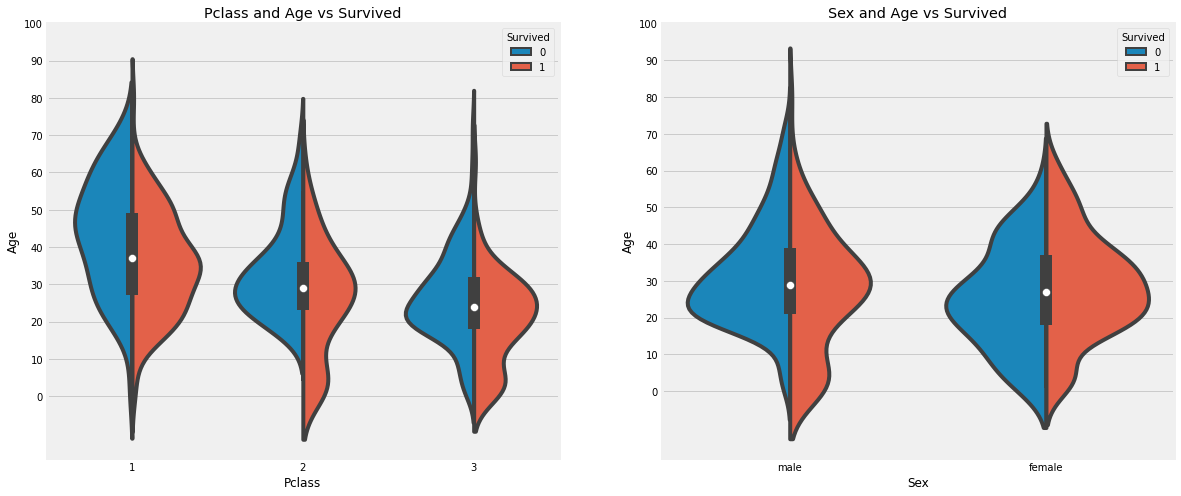

In [12]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

sns.violinplot("Pclass", "Age", hue="Survived", data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot("Sex", "Age", hue="Survived", data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))

plt.show()

### Observations:

1)어린이의 수는 Pclass에 따라 증가하며 10세 미만의 어린이의 생존율은 Pclass에 관계없이 양호한 것으로 보인다.

2)Pclass1인 20-50살의 승객들의 생존가능성은 높고 여성은 더 높다.

3)남성의 경우 나이가 들수록 생존 가능성이 줄어든다.

<br>

As we had seen earlier, the Age feature has **177** null values. To replace these NaN values, we can assign them the mean age of the dataset.

But the problem is, there were many people with many different ages. We just can't assign a 4 year kid with the mean age that is 29 years. Is there any way to find out what age-band does the passenger lie??

**Bingo!!!!**, we can check the **Name** feature. Looking upon the feature, we can see that the names have a salutation like Mr or Mrs. Thus we can assign the mean values of Mr and Mrs to the respective groups.

**''What's In A Name??''---> Feature** :p


앞에서 본 것처럼, Age Feature는 177개의 Null 값을 가지고 있습니다.
이 값들을 데이터 셋의 평균 값으로 대체할 수 있습니다.

하지만 사람들의 연령은 많고 다양합니다. 우리는 자칫 4세 아이의 연령에게 평균 연령 29세를 부여할 수도 있습니다.
승객이 어떤 연령대에 속했는지 알 수 있는 방법이 없을까요?

우리는 이를 위해 Name Feature를 체크해볼 수 있습니다. Name을 보면 Mr와 Mrs 와 같은 salutation이 있습니다.
그렇기 때문에 Mr와 Mrs 의 평균 값을 각각의 그룹에 부여할 수 있습니다.

Name을 통해 Feature를 추출할 수 있습니다.

In [13]:
data['Initial'] = 0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.') # lets extract the Salutations

Okay so here we are using the Regex: **[A-Za-z]+)**.. So what it does is, it looks for strings which lie between **A-Z or a-z** and followed by a .**(dot)**. So we successfully extract the Initials from the Name.

정규표현식 ( [A-Za-z]+). 를 사용했습니다. 이 정규표현식은 A-Z 또는 a-z 사이의 문자열과 그 뒤에 있는 .(dot)을 찾아냅니다.
이것으로 Name에서 Salutation을 추출했습니다.

In [14]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r') # checking th Initial with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Okay so there are some misspelled Initials like Mlle or Mme that stand for Miss. I will replace them with Miss and same thing for other values.

Miss를 나타내는 Mlle, Mme와 같은 잘못 적힌 Initial 이 있습니다. 이 값들을 Miss 등의 다른 값들로 대체하겠습니다.

In [15]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [16]:
data.groupby('Initial')['Age'].mean() #lets check the average age by Initials

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

### Filling NaN Ages

In [17]:
## Assigning the NaN Values with the Ceil values of the mean ages
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [18]:
data.Age.isnull().any() # So no null values left finally

False

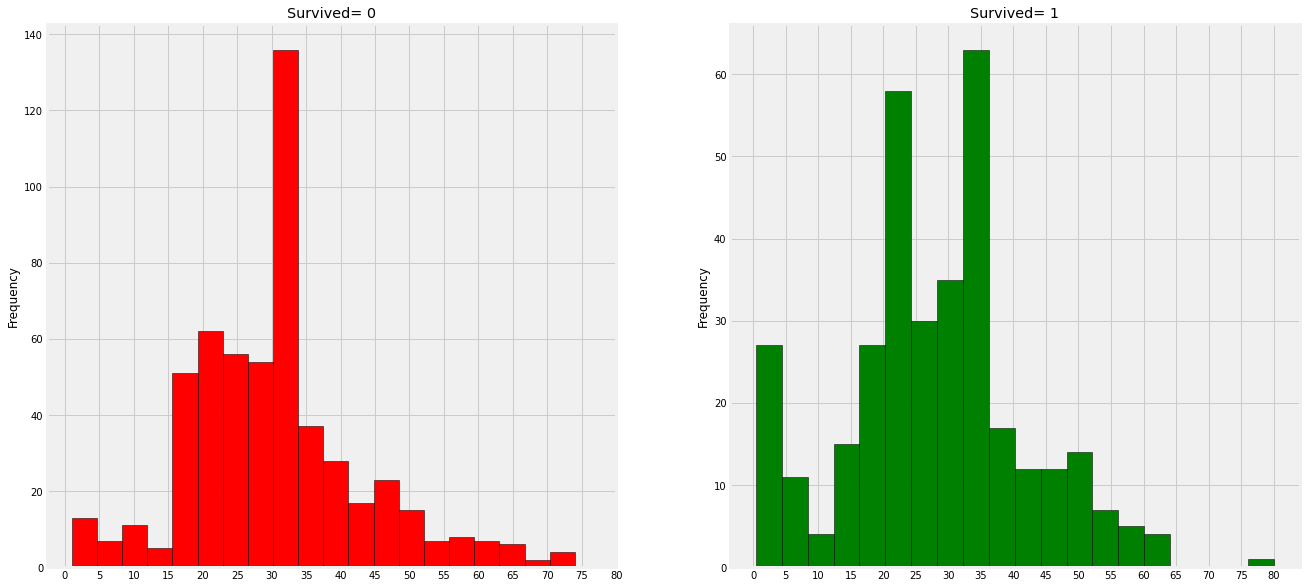

In [19]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived= 0')
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)

data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)

plt.show()

### Observations:

1)5세의 유아들은 대량으로 구조되었다.

2)최고령 승객은 구조되었다(80년).

3)최대 사망자는 30-40세였다.

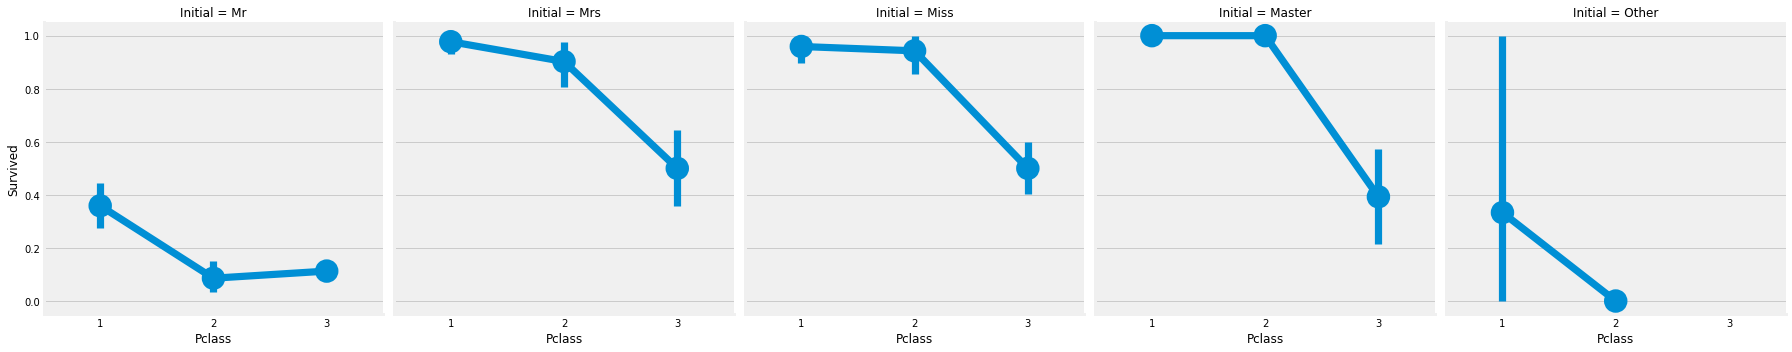

In [20]:
sns.factorplot('Pclass', 'Survived', col='Initial', data=data)
plt.show()

The Women and Child first policy thus holds true irrespective of the class.


각 클래스와 관계없이 여성과 아이가 우선되었다는게 명확해 보입니다.

<br>

## Embarked--> Categorical Value

In [21]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

### Chances for Survival by Port Of Embarkation

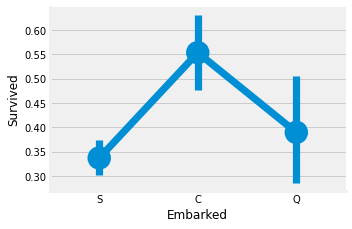

In [22]:
sns.factorplot('Embarked', 'Survived', data=data)
fig = plt.gcf()
fig.set_size_inches(5,3)
plt.show()

The chances for survival for Port C is highest around 0.55 while it is lowest for S.

C항구의 생존률이 약 0.55 정도로 가장 높고, S항구가 가장 낮습니다.

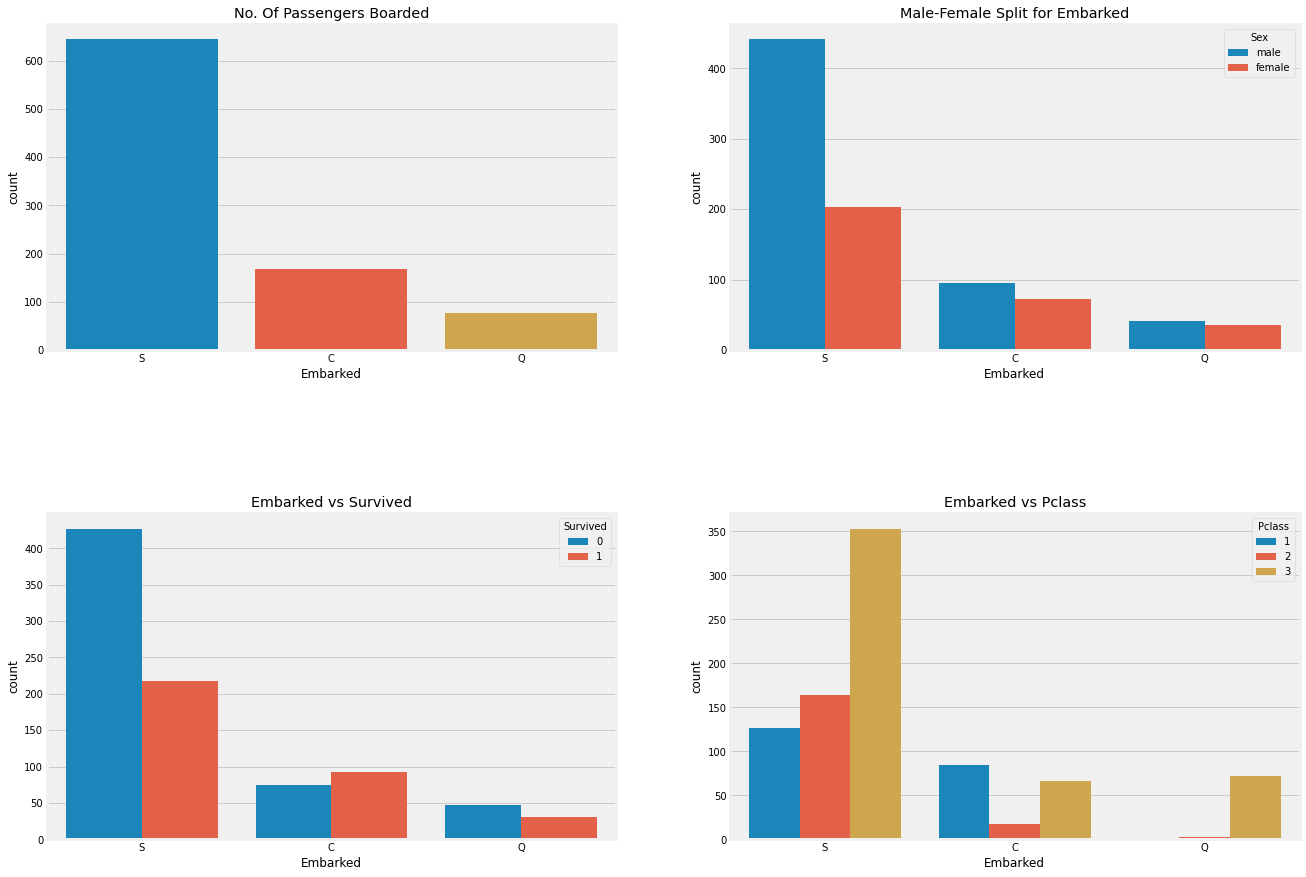

In [23]:
f,ax=plt.subplots(2,2,figsize=(20,15))

sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')

sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

### Observations:


1)S에서 승객들이 가장 많이 탑승했다. 그들 중 대부분은 Pclass3 입니다. Majority of them being from Pclass3.

2)C에서 온 승객들 중 상당수가 살아남았기 때문에 운이 좋은 것으로 보인다. 이것의 이유는 아마도 모든 Pclass1과 Pclass2 승객들의 구조를 위해서일 것이다.

3)승선장 S는 부자들의 대다수가 승선했던 항구로 보인다. Pclass3의 승객 중 81% 정도가 살아남지 못했기 때문에 아직 이곳의 생존 가능성은 낮다.

4)포트 Q는 승객의 거의 95%가 Pclass3에서 왔다.

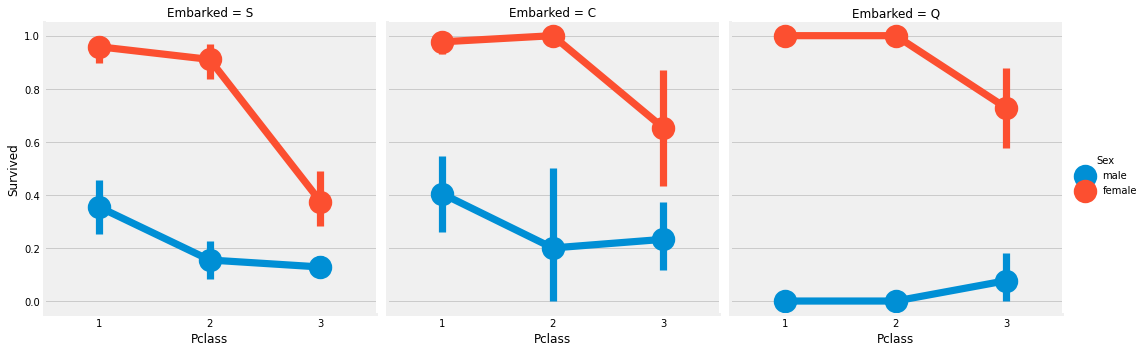

In [24]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=data)
plt.show()

### Observations:

1)Pclass1과 Pclass2의 생존 확률은 Pclass1과 Pclass2에 상관없이 거의 1입니다.

2)port S는 Pclass3 Passenegers 모두 생존율이 매우 낮기 때문에 매우 불운해 보입니다.(돈 문제)

3)port Q는 거의 모두가 P클래스 3 출신이었기 때문에 남성들에게 가장 불행해 보인다.

<br>

### Filling Embarked NaN

As we saw that maximum passengers boarded from Port S, we replace NaN with S.

대부분의 탑승객이 S에서 탑승했기 때문에 S로 채워주겠습니다.

In [25]:
data['Embarked'].fillna('S', inplace=True)

In [26]:
data.Embarked.isnull().any()# Finally No NaN values

False

## SibSip-->Discrete Feature

This feature represents whether a person is alone or with his family members.

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife


이 Feature는 탑승객이 혼자인지 아니면 가족과 함께 탔는지를 나타냅니다.

Sibling → 형제자매, 의붓형제자매

Spouse → 배우자

In [27]:
pd.crosstab(data.SibSp, data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


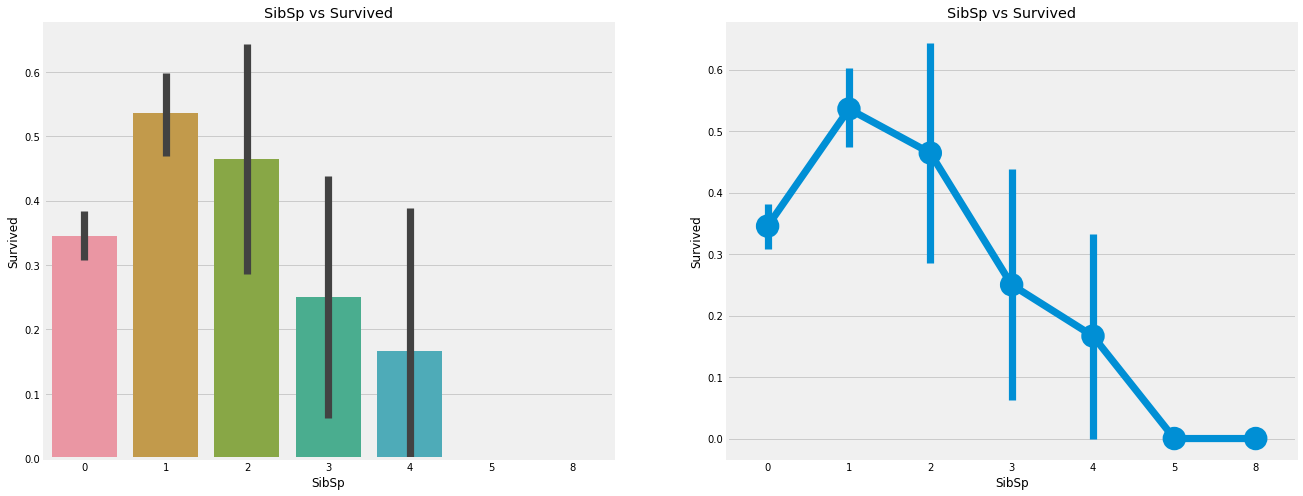

In [28]:
f,ax=plt.subplots(1,2,figsize=(20,8))

sns.barplot('SibSp','Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')

sns.pointplot('SibSp','Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')

plt.show()

In [29]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


### Observations:

The barplot and factorplot shows that if a passenger is alone onboard with no siblings, he have 34.5% survival rate. The graph roughly decreases if the number of siblings increase. This makes sense. That is, if I have a family on board, I will try to save them instead of saving myself first. Surprisingly the survival for families with 5-8 members is **0%**. The reason may be Pclass??

The reason is **Pclass**. The crosstab shows that Person with SibSp > 3 were all in Pclass3. It is imminent that all the large families in Pclass3(>3) died.

barplot과 factorplot을 통해 봤을 때, 승객이 혼자 탑승했을 때 생존률이 34.5% 정도입니다.
그래프의 기울기는 형제자매, 배우자의 수가 증가하면 그래프의 기울기는 감소합니다. 이해가 가는 결과 입니다.
만약, 가족과 함께 탔다면 내가 생존하기 전에 가족을 살리려고 할 것이기 때문입니다.
하지만 놀랍게도 가족의 수가 5-8명인 경우에는 생존률이 0%입니다. 이유는 아마 Pclass 때문일까요?

그 원인은 Pclass입니다. crosstab을 보면 SibSp > 3 인 경우 모두 Pclass 3에 속했습니다.
Pclass 3의 3명 초과 가족들은 모두 사망한 것이 분명합니다.


<br>

## Parch

In [30]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


The crosstab again shows that larger families were in Pclass3.

crosstab을 통해 또 구성원이 많은 가족들은 Pclass3에 속함을 알 수 있습니다.

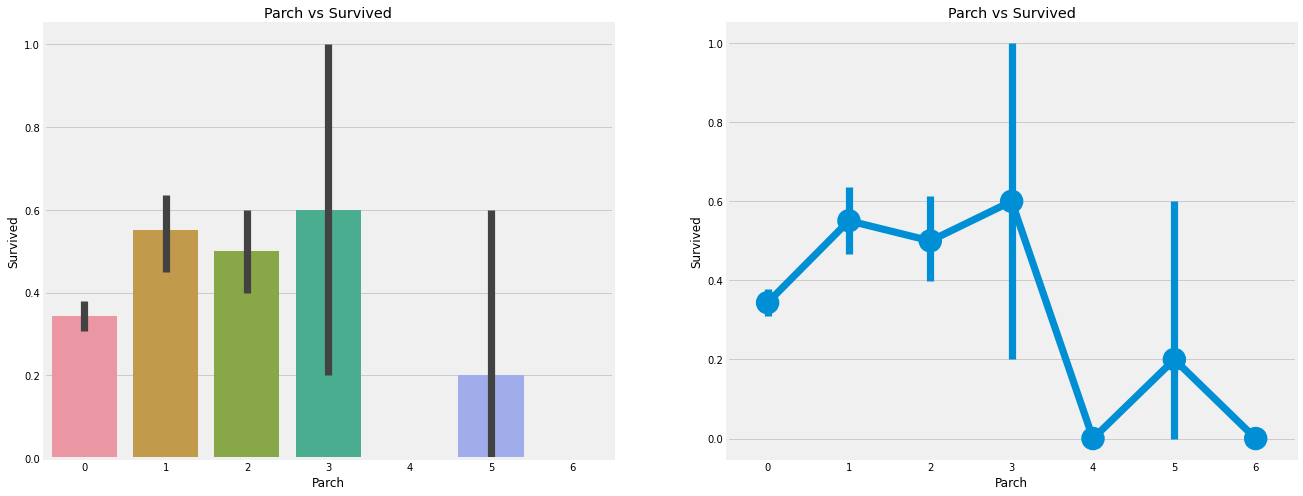

In [31]:
f,ax=plt.subplots(1,2,figsize=(20,8))

sns.barplot('Parch','Survived',data=data,ax=ax[0])
ax[0].set_title('Parch vs Survived')

sns.pointplot('Parch','Survived',data=data,ax=ax[1])
ax[1].set_title('Parch vs Survived')

plt.show()

### Observations:

Here too the results are quite similar. Passengers with their parents and childrens onboard have greater chance of survival. It however reduces as the number goes up.

The chances of survival is good for somebody who has 1-3 parents  and childrens on the ship. Being alone also proves to be fatal and the chances for survival decreases when somebody has >4 parents and childrens on the ship.


비슷한 결과가 나왔습니다. 부모님, 아이와 함꼐 탑승한 승객들의 생존 확률은 높았습니다.
하지만 그 수가 증가할 수록 생존률은 감소했습니다.

1-3명의 부모님, 아이와 탑승한 승객의 생존률이 좋았습니다.
혼자 탑승하는 경우, 생존하기가 어려우며, 가족이 4명이상 탑승한 경우에도 생존률은 감소했습니다.

<br>

## Fare--> Continous Feature

In [32]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


The lowest fare is **0.0**. Wow!! a free luxorious ride.

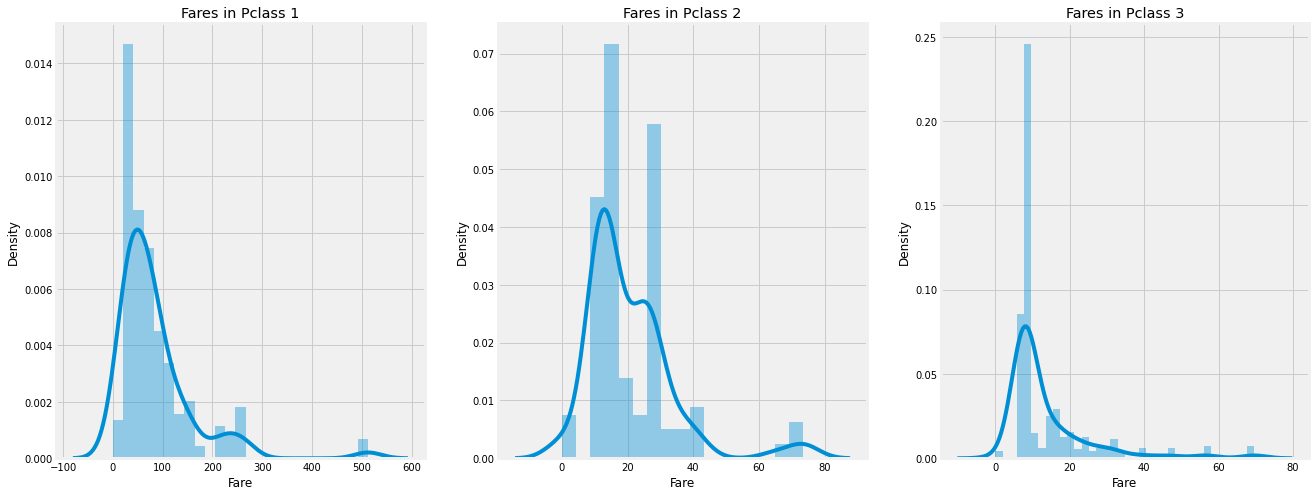

In [33]:
f, ax = plt.subplots(1, 3, figsize=(20, 8))

sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')

sns.distplot(data[data['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')

sns.distplot(data[data['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')

plt.show()

There looks to be a large distribution in the fares of Passengers in Pclass1 and this distribution goes on decreasing as the standards reduces. As this is also continous, we can convert into discrete values by using binning.

Pclass 1 탑승객의 경우 요금 분포가 넓게 퍼져있습니다. 그리고 Pclass의 등급이 낮아질 때마다 분포는 좁아집니다. 이 변수는 연속형이기 때문에, 우리는 binning을 통해 이산형 값들로 변환해줄 것입니다.

## Observations in a Nutshell for all features:

**Sex**: 여성의 생존 가능성은 남성과 비교했을 때 높다.

**Pclass**:There is a visible trend that being a **1st class passenger** gives you better chances of survival. The survival rate for **Pclass3 is very low**. For **women**, the chance of survival from **Pclass1** is almost 1 and is high too for those from **Pclass2. Money Wins!!!**.

**Age**: Children less than 5-10 years do have a high chance of survival. Passengers between age group 15 to 35 died a lot.

**Embarked**: This is a very interesting feature. **The chances of survival at C looks to be better than even though the majority of Pclass1 passengers got up at S**. Passengers at Q were all from **Pclass3**.

**Parch+SibSp**: Having 1-2 siblings,spouse on board or 1-3 Parents and Children shows a greater chance of probablity rather than being alone or having a large family travelling with you.



Sex : 여성의 생존확률이 남성에 비해 높았습니다.

Pclass :1st 클래스 탑승객의 생존률이 높은 경향을 보였습니다. Pclass 3의 생존률은 매우 낮았습니다.
여성의 경우 Pclass 1 탑승객의 생존률은 거의 1이었고, Pclass 2의 경우에도 높았습니다. 결국 생존에는 돈이 중요했습니다.

Age : 5-10세보다 적은 어린이들의 생존확률이 높았습니다. 15-35세의 탑승객들은 많이 사망했습니다.

Embarked : 흥미로운 Feature 였습니다. 다수의 Pclass 1 탑승객이 S에서 제일 많았지만, C에서 탑승한 승객의 생존률이 더 높았습니다.
Q에서 탑승한 승객은 거의 다 Pclass 3 에 속했습니다.

Parch + SibSp : 1-2명의 형제자매, 1-3명의 가족, 자녀와 함께 탑승한 경우가 혼자 탑승 또는 많은 수의 가족과 함께 탑승한 경우보다 훨씬 생존률이 높았습니다.

## Correlation Between The Features

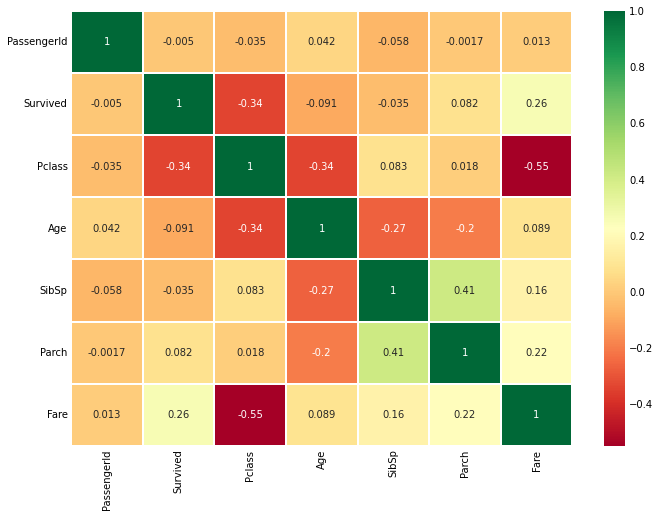

In [34]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2) # data.corr() --> correlation matrix

fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

## Interpreting The Heatmap

The first thing to note is that only the numeric features are compared as it is obvious that we cannot correlate between alphabets or strings. Before understanding the plot, let us see what exactly correlation is.

**POSITIVE CORRELATION**: If an **increase in feature A leads to increase in feature B, then they are positively correlated**. A value **1 means perfect positive correlation**.

**NEGATIVE CORRELATION**: If an **increase in feature A leads to decrease in feature B, then they are negatively correlated**. A value **-1 means perfect negative correlation**.

Now lets say that two features are highly or perfectly correlated, so the increase in one leads to increase in the other. **즉, 두 특징 모두 매우 유사한 정보를 포함하고 있으며 정보의 편차가 거의 또는 전혀 없다.** This is known as **MultiColinearity** as both of them contains almost the same information.

So do you think we should use both of them as **one of them is redundant**. While making or training models, we should try to eliminate redundant features as it reduces training time and many such advantages.

Now from the above heatmap,we can see that the features are not much correlated. The highest correlation is between **SibSp and Parch i.e 0.41**. So we can carry on with all features.

<br>

먼저 알아야 할 것은, 숫자데이터가 아닌 문자열 데이터의 상관관계는 구할 수 없다는 것입니다.
plot을 이해하기전에 상관관계가 무엇인지 보겠습니다.

양의 상관관계(Positive Correlation) :
feature A의 증가하는데 feature B가 증가한다면, 두 feature는 양의 상관관계입니다. 1 은 완전 양의 상관관계를 의미합니다.

음의 상관관계(Negative Correlation) :
feature A의 감소하는데 feature B가 증가한다면, 두 feature는 음의 상관관계입니다. -1 은 완전 음의 상관관계를 의미합니다.

두 Feature가 상당히 높은, 혹은 완전한 양의 상관관계를 가지고 있다고 하면, 한 feature값이 증가하면 다른 feature의 값도 증가합니다.
이것은 두 feature가 매우 비슷한 정보를 가지고 있으며, 그 정보간의 분산이 거의 없다는 것을 의미합니다. 이를 다중공선성(MultiColinearity)이라 합니다.

이 변수들이 redundant할 때, 우리는 그 변수를 둘 다 사용해야할까요?
모델을 만들거나 학습시킬 때, 학습시간을 줄이는 등 다른 이점을 위해 redudant한 feature는 제거되도록 해야합니다.

위의 Heatmap을 보았을 때, feature들간의 상관관계는 그렇게 높아보이지 않습니다.
가장 높은 상관관계를 지닌 두 변수는 SibSp와 Parch로 상관계수는 0.41입니다. 그렇기 때문에 모든 feature를 사용하도록 하겠습니다.

# Part2: Feature Engineering and Data Cleaning

Now what is Feature Engineering?

Whenever we are given a dataset with features, it is not necessary that all the features will be important. There maybe be many redundant features which should be eliminated. Also we can get or add new features by observing or extracting information from other features.

An example would be getting the Initals feature using the Name Feature. Lets see if we can get any new features and eliminate a few. Also we will tranform the existing relevant features to suitable form for Predictive Modeling.

<br>

Feature Engineering이 무엇일까요?

feature들이 있는 dataset이 주어졌을 때, 모든 feature가 중요하진 않습니다.
제거되어야 할 redundant한 Feature가 있을 수 있습니다. 그리고 다른 feature의 관찰, 정보 추출을 통해 새로운 feature를 만들 수도 있습니다.

Name으로부터 Initial 을 만들어낸 것도 한 예입니다. 새로운 feature를 만들거나 제거해야할 Feature가 있는지 살펴보겠습니다.
그리고 예측 모델에 적합한 형태로 feature들을 변환하겠습니다.

## Age_band
**Problem With Age Feature**:
As I have mentioned earlier that **Age is a continous feature**, there is a problem with Continous Variables in Machine Learning Models.

**Eg**:If I say to group or arrange Sports Person by **Sex**, We can easily segregate them by Male and Female.

Now if I say to group them by their **Age**, then how would you do it? If there are 30 Persons, there may be 30 age values. Now this is problematic.

We need to convert these **continous values into categorical values** by either Binning or Normalisation. I will be using binning i.e group a range of ages into a single bin or assign them a single value.

Okay so the maximum age of a passenger was 80. So lets divide the range from 0-80 into 5 bins. So 80/5=16. So bins of size 16.

<br>
먼저 언급했듯이, Age는 continuous feature 입니다. continuous feature의 경우, 머신러닝모델에 있어 문제가 하나 있습니다.

가령, 운동선수들을 성별로 그룹을 나눈다고 할 때, 우리는 쉽게 남성, 여셩으로 나눌 수 있습니다.

연령으로 그룹을 나눈다고 할때, 어떻게 나눌수 있을까요? 만약 30명의 사람에 30개의 연령값이 있다고 하겠습니다. 이런 경우가 문제가 됩니다.

우리는 contiunous 값을 category값으로 Binning이나 Normalization을 통해 변환해야합니다. 이번에는 binning을 통해 연령에 하나의 값을 할당하겠습니다.

최대 연령이 80세이기 떄문에, 0부터 80세까지의 연령을 5개의 bin으로 나누겠습니다. 80/5 = 16 이기 때문에, bin하나의 사이즈는 16입니다.

In [35]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [36]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')#checking the number of passenegers in each band

,Age_band
1,382
2,325
0,104
3,69
4,11


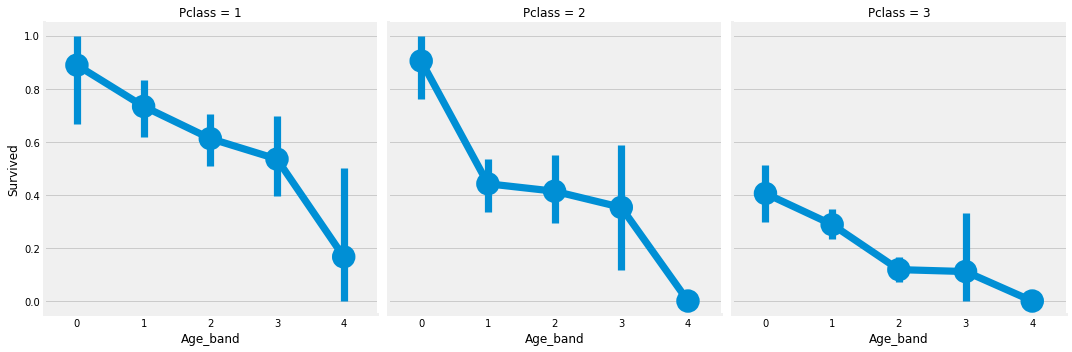

In [37]:
sns.factorplot('Age_band', 'Survived', data=data, col='Pclass')
plt.show()

True that..the survival rate decreases as the age increases irrespective of the Pclass.


Pclass와 관계없이 연령이 증가할수록 생존률이 낮아집니다.

<br>

## Family_Size and Alone

At this point, we can create a new feature called "Family_size" and "Alone" and analyse it. This feature is the summation of Parch and SibSp. It gives us a combined data so that we can check if survival rate have anything to do with family size of the passengers. Alone will denote whether a passenger is alone or not.

이번에는 "Family_Size"와 "Alone" Feature를 만들어 분석하겠습니다.
이 Feature들은 Parch와 SibSp의 요약입니다. 가족의 수와 생존률의 관계를 체크하기 위한 통합된 데이터를 얻을 수 있습니다.
Alone은 승객이 혼자인지 아닌지를 나타냅니다.

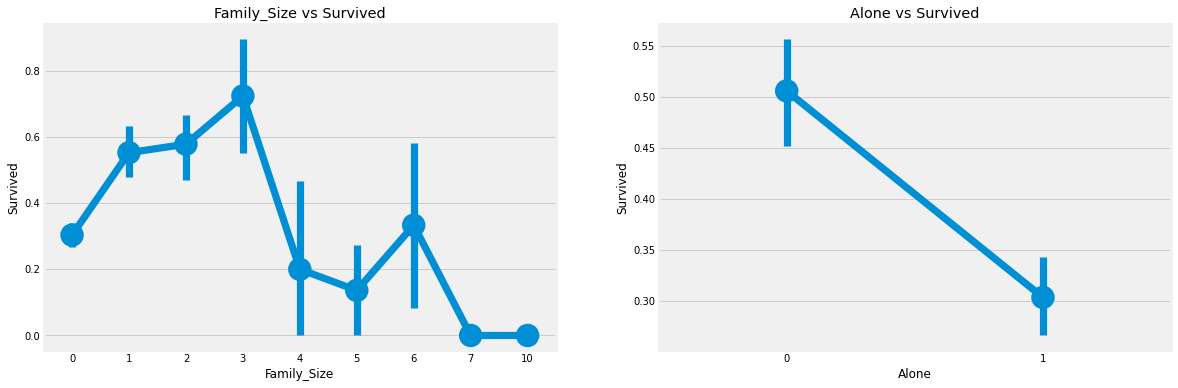

In [38]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp'] # family size
data['Alone'] = 0
data.loc[data.Family_Size==0, 'Alone'] = 1 # Alone

f, ax = plt.subplots(1, 2, figsize=(18,6))

sns.pointplot('Family_Size', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Family_Size vs Survived')

sns.pointplot('Alone', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Alone vs Survived')

plt.show()

**Family_Size=0 means that the passeneger is alone**. Clearly, if you are alone or family_size=0,then chances for survival is very low. For family size > 4,the chances decrease too. This also looks to be an important feature for the model. Lets examine this further.

Family_Size = 0 은 탑승객이 혼자임을 의미합니다. 혼자일 때, 생존률은 매우 낮습니다.
가족 수가 4명 이상일 때도 생존률은 감소합니다. 때문에 모델링에 중요한 Feature인 것 같습니다. 조금 더 분석해보겠습니다.

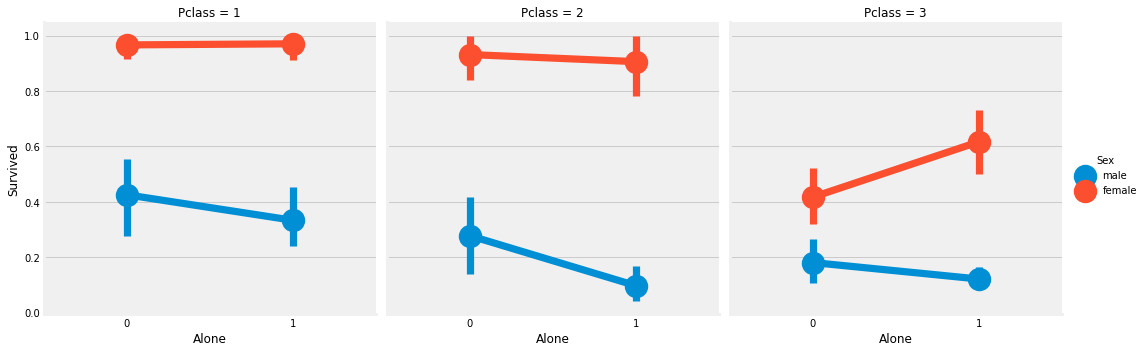

In [39]:
sns.factorplot('Alone', 'Survived', data=data, hue='Sex', col='Pclass')
plt.show()

It is visible that being alone is harmful irrespective of Sex or Pclass except for Pclass3 where the chances of females who are alone is high than those with family.

Pclass와 무관하게 혼자 탑승한 경우는 위험합니다. 하지만 예외적으로 Pclass 3 여성 탑승객의 생존률은 가족과 함께 탑승하지 않은 경우보다 오히려 높습니다.

<br>

## Fare_Range

Since fare is also a continous feature, we need to convert it into ordinal value. For this we will use **pandas.qcut.**

So what **qcut** does is it splits or arranges the values according the number of bins we have passed. So if we pass for 5 bins, it will arrange the values equally spaced into 5 seperate bins or value ranges.

Fare는 연속형 Feature이기 때문에, 이것을 서수형 값(Ordinal value)로 변환하겠습니다. 이 작업에pandas.qcut을 사용할 것입니다.

qcut 은 우리가 입력한 구간의 수(bin)에 따라 데이터 값을 분할 해줍니다. 가령 우리가 5개 구간을 입력하면, 5개의 구간으로 데이터 수를 균일하게 분할합니다.

In [40]:
data['Fare_Range'] = pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


As discussed above, we can clearly see that as the **fare_range increases, the chances of survival increases.**

Now we cannot pass the Fare_Range values as it is. We should convert it into singleton values same as we did in **Age_Band**


위에서 얘기한 것처럼, Fare_Range가 증가할 수록 생존률도 증가합니다.

하지만 우리는 Fare_Range를 그대로 사용할 수 없습니다. Age_Band에서 했던 것과 동일하게 하나의 값으로 변환해주어야 합니다.

In [41]:
data['Fare_cat'] = 0
data.loc[data['Fare'] <= 7.91,'Fare_cat'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare_cat'] = 1
data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare_cat'] = 2
data.loc[(data['Fare'] > 31) & (data['Fare'] <= 513), 'Fare_cat'] = 3

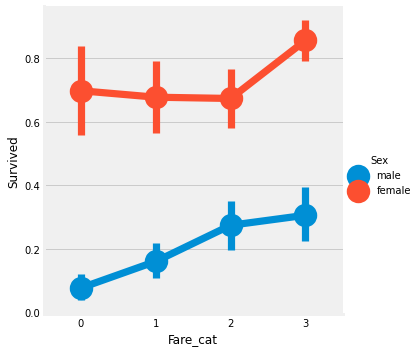

In [42]:
sns.factorplot('Fare_cat', 'Survived', data=data, hue='Sex')
plt.show()

Clearly, as the Fare_cat increases, the survival chances increases. This feature may become an important feature during modeling along with the Sex.


Fare_cat 이 증가할수록 생존률이 증가합니다. 이것도 Sex와 함께 모델링에 중요한 Feature가 될 것 같습니다.


## Converting String Values into Numeric

Since we cannot pass strings to a machine learning model, we need to convert features loke Sex, Embarked, etc into numeric values.

문자열 값을 머신러닝 모델에 사용할 수 없기 때문에, Sex, Embarked 등의 feature를 숫자값으로 변환해주어야 합니다.

In [43]:
data['Sex'].replace(['male','female'], [0,1], inplace=True)
data['Embarked'].replace(['S','C','Q'], [0,1,2], inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'], [0,1,2,3,4], inplace=True)

### Dropping UnNeeded Features

**Name**--> 범주형 값으로 변환할 수 없으므로 이름 기능이 필요하지 않습니다.

**Age**--> We have the Age_band feature, so no need of this.

**Ticket**--> It is any random string that cannot be categorised.

**Fare**--> 분류할 수 없는 임의의 문자열입니다.

**Cabin**--> NaN 값이 많고 승객도 여러 개의 객실을 가지고 있습니다. 그래서 이것은 쓸모없는 기능입니다.

**Fare_Range**--> We have the fare_cat feature.

**PassengerId**--> Cannot be categorised.

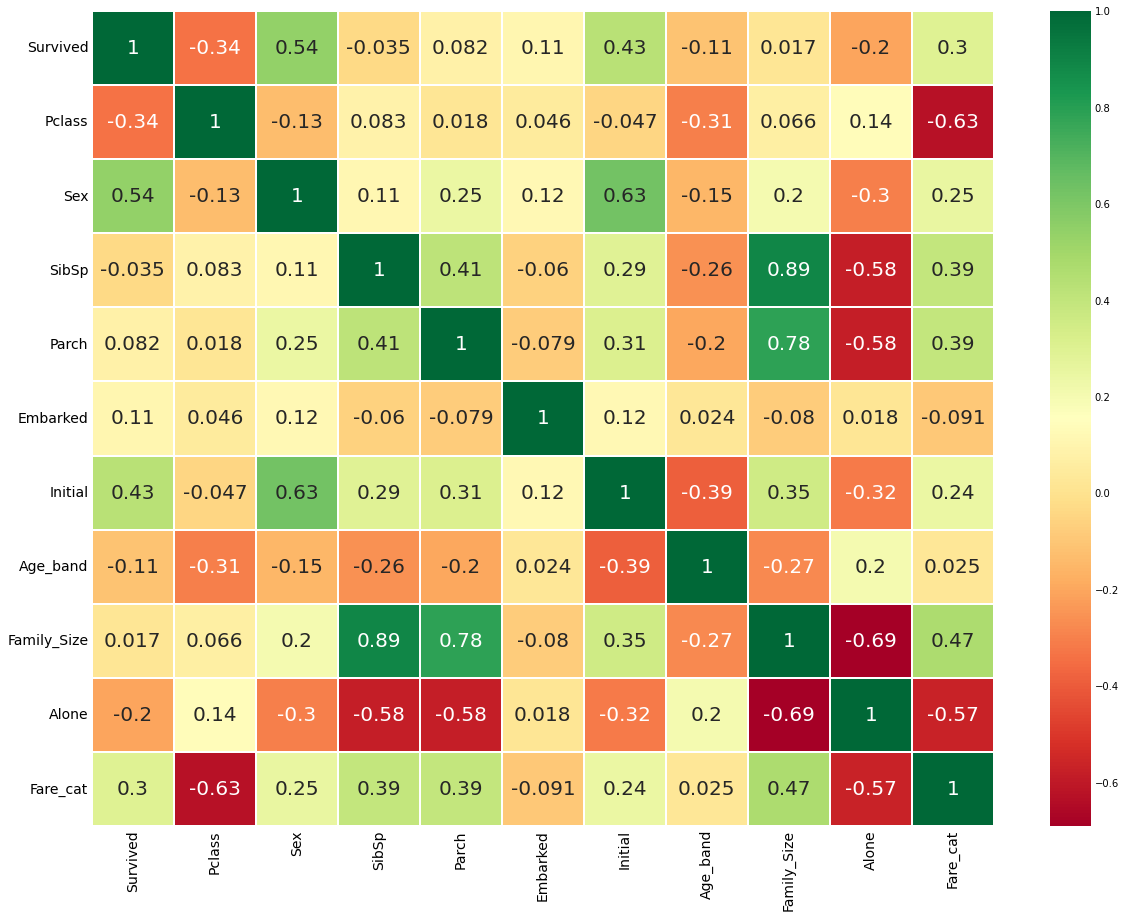

In [44]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)

sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})

fig=plt.gcf()
fig.set_size_inches(18,15)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

Now the above correlation plot, we can see some positively related features. Some of them being **SibSp andd Family_Size** and **Parch and Family_Size** and some negative ones like **Alone and Family_Size.**

위의 Correlation plot에서 몇몇 양의 상관관계를 가진 feature들을 볼 수 있습니다.
SibSp, Family_Size와 Parch 가 양의 상관관계를 가지고, Alone과 Family_Size는 음의 상관관계를 가지고 있습니다.

# Part3: Predictive Modeling

We have gained some insights from the EDA part. But with that, we cannot accurately predict or tell whether a passenger will survive or die. So now we will predict the whether the Passenger will survive or not using some great Classification Algorithms.Following are the algorithms I will use to make the model:

1)Logistic Regression

2)Support Vector Machines(Linear and radial)

3)Random Forest

4)K-Nearest Neighbours

5)Naive Bayes

6)Decision Tree

In [45]:
# importing all the required ML packages
from sklearn.linear_model import LogisticRegression # logistic regression
from sklearn import svm # support vector Machine
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.naive_bayes import GaussianNB # Naive bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.model_selection import train_test_split # training and testing data split
from sklearn import metrics # accuracy measure
from sklearn.metrics import confusion_matrix # for confusion matrix

In [46]:
# stratify: default=None.
# classification을 다룰 때 매우 중요한 옵션값.
# stratify 값을 target으로 지정해주면 각각의 class 비율(ratio)을 train / validation에 유지해 줍니다.(한 쪽에 쏠려서 분배되는 것을 방지)
# 만약 이 옵션을 지정해 주지 않고 classification 문제를 다룬다면, 성능의 차이가 많이 날 수 있습니다.
train, test = train_test_split(data, test_size=0.3, random_state=0, stratify=data['Survived'])

train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[train.columns[1:]]
test_Y = test[train.columns[:1]]

X = data[data.columns[1:]]
Y = data['Survived']

### Radial Support Vector Machines(rbf-SVM)

In [47]:
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)

print('Accuracy for rbf SVM is', metrics.accuracy_score(prediction1, test_Y))

Accuracy for rbf SVM is 0.835820895522388


### Linear Support Vector Machine(linear-SVM)

In [48]:
model = svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model.fit(train_X,train_Y)
prediction2 = model.predict(test_X)

print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is 0.8171641791044776


### Logistic Regression

In [49]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3 = model.predict(test_X)

print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.8134328358208955


### Decision Tree

In [50]:
model = DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4 = model.predict(test_X)

print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.8022388059701493


### K-Nearest Neighbours(KNN)

In [51]:
model = KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5 = model.predict(test_X)

print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.832089552238806


Now the accuracy for the KNN model changes as we change the values for **n_neighbours** attribute. The default value is *5**. Lets check the accuracies over various values of n_neighbours.

KNN 모델의 정확도는 n_neighbors 값을 조절하면 변화합니다. 기본값은 5입니다. n_neighbor의 여러 값에 따른 정확도를 체크해보겠습니다.

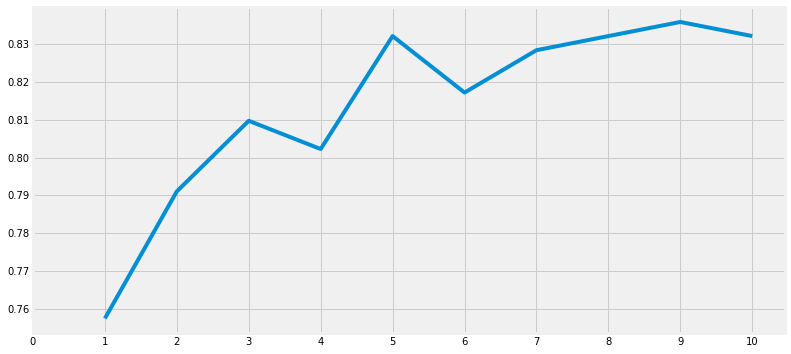

Accuracies for different values of n are: [0.75746269 0.79104478 0.80970149 0.80223881 0.83208955 0.81716418
 0.82835821 0.83208955 0.8358209  0.83208955] with the max value as  0.835820895522388


In [52]:
a_index = list(range(1,11))
a = pd.Series()
x = [0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))

plt.plot(a_index, a)
plt.xticks(x)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

print('Accuracies for different values of n are:', a.values, 'with the max value as ', a.values.max())

### Gaussian Naive Bayes

In [53]:
model = GaussianNB()
model.fit(train_X,train_Y)
prediction6 = model.predict(test_X)

print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


### Random Forests

In [54]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7 = model.predict(test_X)

print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.8171641791044776


The accuracy of a model is not the only factor that determines the robustness of the classifier. Let's say that a classifier is trained over a training data and tested over the test data and it scores an accuracy of 90%.

Now this seems to be very good accuracy for a classifier, but can we confirm that it will be 90% for all the new test sets that come over??. The answer is **No**, because we can't determine which all instances will the classifier will use to train itself. As the training and testing data changes, the accuracy will also change. It may increase or decrease. This is known as **model variance.**

To overcome this and get a generalized model,we use **Cross Validation.**

# Cross Validation

Many a times, the data is imbalanced, i.e there may be a high number of class1 instances but less number of other class instances. Thus we should train and test our algorithm on each and every instance of the dataset. Then we can take an average of all the noted accuracies over the dataset.

1)The K-Fold Cross Validation works by first dividing the dataset into k-subsets.

2)Let's say we divide the dataset into (k=5) parts. We reserve 1 part for testing and train the algorithm over the 4 parts.

3)We continue the process by changing the testing part in each iteration and training the algorithm over the other parts. The accuracies and errors are then averaged to get a average accuracy of the algorithm.

This is called K-Fold Cross Validation.

4)An algorithm may underfit over a dataset for some training data and sometimes also overfit the data for other training set. Thus with cross-validation, we can achieve a generalised model.

In [55]:
from sklearn.model_selection import KFold # for K-fold cross validation
from sklearn.model_selection import cross_val_score # score evaluation
from sklearn.model_selection import cross_val_predict # prediction

kfold = KFold(n_splits=10, random_state=22) # k=10, splot the dat into 10 equal parts
xyz = []
accuracy = []
std = []
classifiers = ['Linear Svm', 'Radial Svm', 'Logistic Regression', 'KNN', 'Decision Tree', 'Naive Bayes', 'Random Forest']
models = [svm.SVC(kernel='linear'), svm.SVC(kernel='rbf'), LogisticRegression(), KNeighborsClassifier(n_neighbors=9), DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators=100)]

for i in models:
    model = i
    cv_result = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)

new_models_dataframe2 = pd.DataFrame({'CV Mean':xyz, 'Std':std}, index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.793471,0.047797
Radial Svm,0.828290,0.034427
Logistic Regression,0.805843,0.024061
KNN,0.813783,0.041210
Decision Tree,0.809238,0.028137
Naive Bayes,0.801386,0.028999
Random Forest,0.817091,0.036754


<AxesSubplot:>

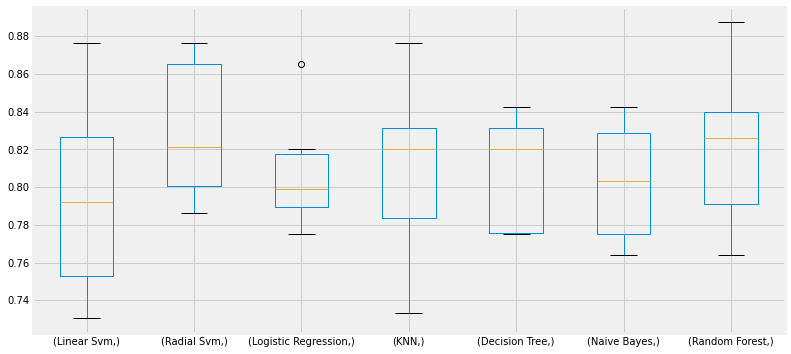

In [56]:
plt.subplots(figsize=(12,6))
box = pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()

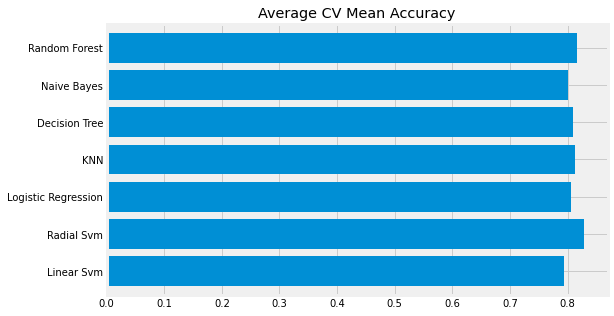

In [57]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)

plt.title('Average CV Mean Accuracy')
fig = plt.gcf()
fig.set_size_inches(8,5)

plt.show()

The classification accuracy can be sometimes misleading due to imbalance. We can get a summarized result with the help of confusion matrix, which shows where did the model go wrong, or which class did the model predict wrong.

<br>

## Confusion Matrix

It gives the number of correct and incorrect classifications made by the classifier.

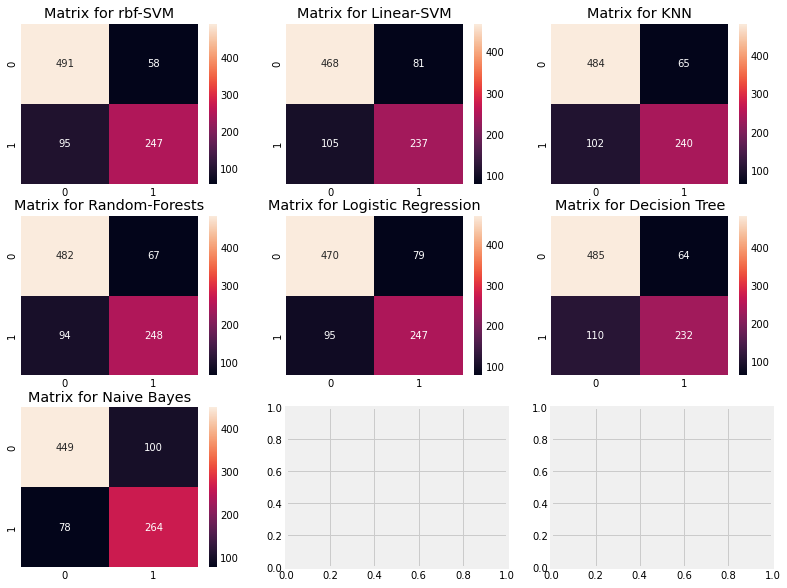

In [58]:
f, ax=plt.subplots(3, 3, figsize=(12,10))

y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[0,0], annot=True, fmt='2.0f')

ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[0,1], annot=True, fmt='2.0f')

ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[0,2], annot=True, fmt='2.0f')

ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[1,0], annot=True, fmt='2.0f')

ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[1,1], annot=True, fmt='2.0f')

ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[1,2], annot=True, fmt='2.0f')

ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[2,0], annot=True, fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')

plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

### Interpreting Confusion Matrix

The left diagonal shows the number of correct predictions made for each class while the right diagonal shows the number of wrong prredictions made. Lets consider the first plot for rbf-SVM:

1)The no. of correct predictions are **491(for dead) + 247(for survived)** with the mean CV accuracy being **(491+247)/891 = 82.8%** which we did get earlier.

2)**Errors**--> Wrongly Classified 58 dead people as survived and 95 survived as dead. Thus it has made more mistakes by predicting dead as survived.

By looking at all the matrices, we can say that rbf-SVM has a higher chance in correctly predicting dead passengers but NaiveBayes has a higher chance in correctly predicting passengers who survived.

## Hyper-Parameters Tuning

The machine learning models are like a Black-Box. There are some default parameter values for this Black-Box, which we can tune or change to get a better model. Like the C and gamma in the SVM model and similarly different parameters for different classifiers, are called the hyper-parameters, which we can tune to change the learning rate of the algorithm and get a better model. This is known as Hyper-Parameter Tuning.

We will tune the hyper-parameters for the 2 best classifiers i.e the SVM and RandomForests.

### SVM

In [59]:
from sklearn.model_selection import GridSearchCV

C = [0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gamma = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
kernel = ['rbf', 'linear']
hyper = {'kernel':kernel, 'C':C, 'gamma':gamma}
gd = GridSearchCV(estimator=svm.SVC(), param_grid=hyper, verbose=True)
gd.fit(X,Y)

print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8282593685267716
SVC(C=0.4, gamma=0.3)


[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   16.8s finished


### Random Forests

In [60]:
n_estimators = range(100, 1000, 100)
hyper = {'n_estimators':n_estimators}
gd = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=hyper, verbose=True)
gd.fit(X,Y)

print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   37.6s finished


0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)


The best score for Rbf-Svm is **82.82% with C=0.05 and gamma=0.1**. For RandomForest, score is abt **81.9% with n_estimators=300**.

## Ensembling

Ensembling is a good way to increase the accuracy or performance of a model. In simple words, it is the combination of various simple models to create a single powerful model.(앙상블은 모델의 정확성 또는 성능을 높이는 좋은 방법입니다. 간단히 말해서, 그것은 다양한 간단한 모델들이 결합하여 하나의 강력한 모델을 만드는 것입니다.)

Lets say we want to buy a phone and ask many people about it based on various parameters. So then we can make a strong judgement about a single product after analysing all different parameters. This is **Ensembling**, which improves the stability of the model. Ensembling can be done in ways like:

1)Voting Classifier

2)Bagging

3)Boosting.

## Voting Classifier

It is the simplest way of combining predictions from many different simple machine learning models.(다른 기계 학습 모델의 예측을 결합하는 가장 간단한 방법)

It gives an average prediction result based on the prediction of all the submodels. The submodels or the basemodels are all of diiferent types.(예측값은 각 서브모델 예측치의 평균치입니다. 각 서브모델들은 다 다른 유형의 모델입니다.)

In [61]:
from sklearn.ensemble import VotingClassifier

ensemble_lin_rbf = VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=10)),
                                                ('RBF', svm.SVC(probability=True, kernel='rbf', C=0.5, gamma=0.1)),
                                                ('RFor', RandomForestClassifier(n_estimators=500, random_state=0)),
                                                ('LR', LogisticRegression(C=0.05)),
                                                ('DT', DecisionTreeClassifier(random_state=0)),
                                                ('NB', GaussianNB()),
                                                ('svm', svm.SVC(kernel='linear', probability=True))], 
                                    voting='soft').fit(train_X, train_Y)
print('The accuracy for ensembled model is:', ensemble_lin_rbf.score(test_X,test_Y))

cross = cross_val_score(ensemble_lin_rbf, X, Y, cv = 10, scoring = "accuracy")
print('The cross validated score is', cross.mean())

The accuracy for ensembled model is: 0.8246268656716418
The cross validated score is 0.8249188514357053


## Bagging

Bagging is a general ensemble method. It works by applying similar classifiers on small partitions of the dataset and then taking the average of all the predictions. Due to the averaging,there is reduction in variance. Unlike Voting Classifier, Bagging makes use of similar classifiers.

배깅은 일반적인 앙상블 방법입니다.
데이터셋의 작은 파티션에 대해 유사한 분류기들을 적용하고, 모든 예측치에 대한 평균을 적용함으로써 작용합니다.
평균화를 통해 분산이 감소됩니다. Voting Classifier와는 달리 배깅은 유사한 분류기를 사용합니다.

<br>

### Bagged KNN

Bagging works best with models with high variance. An example for this can be Decision Tree or Random Forests. We can use KNN with small value of n_neighbours, as small value of **n_neighbours**.

In [62]:
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3), random_state=0, n_estimators=700)
model.fit(train_X, train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is:', metrics.accuracy_score(prediction,test_Y))

result = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for bagged KNN is:', result.mean())

The accuracy for bagged KNN is: 0.835820895522388
The cross validated score for bagged KNN is: 0.8160424469413232


### Bagged DecisionTree

In [63]:
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0, n_estimators=100)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged Decision Tree is:', metrics.accuracy_score(prediction, test_Y))

result = cross_val_score(model, X, Y,cv=10, scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:', result.mean())

The accuracy for bagged Decision Tree is: 0.8208955223880597
The cross validated score for bagged Decision Tree is: 0.8171410736579275


## Boosting

부스팅은 분류기의 순차적인 학습을 이용한 앙상블 기법입니다. 순차적으로 약한 모델을 향상시켜나갑니다.
부스팅은 아래와 같이 작동합니다 :

모델은 처음 전체 데이터셋에 대해 학습합니다. 이 때 모델은 일부 객체는 올바르게, 일부 객체는 틀리게 예측할 것입니다.
그 다음 시행에서, 틀리게 예측한 객체에 더욱 가중치를 두어 학습합니다. 결과적으로 틀리게 예측한 객체를 올바르게 예측하려고 노력합니다.
이런 과정이 반복되면서, 정확도가 한계에 도달할 때까지 새 분류기가 모델에 추가됩니다.


Boosting is an ensembling technique which uses sequential learning of classifiers. It is a step by step enhancement of a weak model.Boosting works as follows:

A model is first trained on the complete dataset. Now the model will get some instances right while some wrong. Now in the next iteration, the learner will focus more on the wrongly predicted instances or give more weight to it. Thus it will try to predict the wrong instance correctly. Now this iterative process continous, and new classifers are added to the model until the limit is reached on the accuracy.

### AdaBoost(Adaptive Boosting)

The weak learner or estimator in this case is a Decsion Tree. But we can change the dafault base_estimator to any algorithm of our choice.

이번 케이스에서 약한 학습기는 Decision Tree입니다. 하지만 우리는 기본 base_estimator를 우리의 선택에 따라 다른 알고리즘으로 바꿀수 있습니다.

In [64]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.1)
result = cross_val_score(ada, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for AdaBoost is:', result.mean())

The cross validated score for AdaBoost is: 0.8249188514357055


### Stochastic Gradient Boosting

Here too the weak learner is a Decision Tree.

이번에도 약한 학습기는 Decision Tree 입니다.

In [65]:
from sklearn.ensemble import GradientBoostingClassifier

grad = GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate=0.1)
result = cross_val_score(grad, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8115230961298376


### XGBoost

In [66]:
import xgboost as xg

xgboost = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
result = cross_val_score(xgboost, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for XGBoost is:', result.mean())

[13:18:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:18:02] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:18:04] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:18:07] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

We got the highest accuracy for AdaBoost. We will try to increase it with Hyper-Parameter Tuning


AdaBoost가 가장 높은 정확도를 기록했습니다. 이 정확도를 하이퍼파라미터 튜닝을 통해 더 높여보겠습니다.

<br>

### Hyper-Parameter Tuning for AdaBoost

In [67]:
n_estimators = list(range(100, 1100, 100))
learn_rate = [0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
hyper = {'n_estimators':n_estimators, 'learning_rate':learn_rate}
gd = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=hyper, verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed: 11.5min finished


0.8293892411022534
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


The maximum accuracy we can get with AdaBoost is **82.93% with n_estimators=100 and learning_rate=0.1**

<br>

### Confusion Matrix for the Best Model

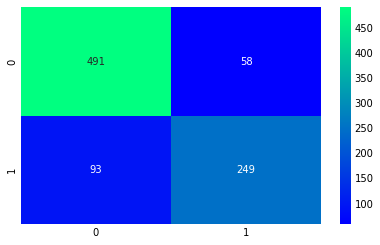

In [68]:
ada = AdaBoostClassifier(n_estimators=100, random_state=0, learning_rate=0.1)
result = cross_val_predict(ada, X, Y, cv=10)

sns.heatmap(confusion_matrix(Y,result), cmap='winter', annot=True, fmt='2.0f')
plt.show()

## Feature Importance

[13:29:59] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


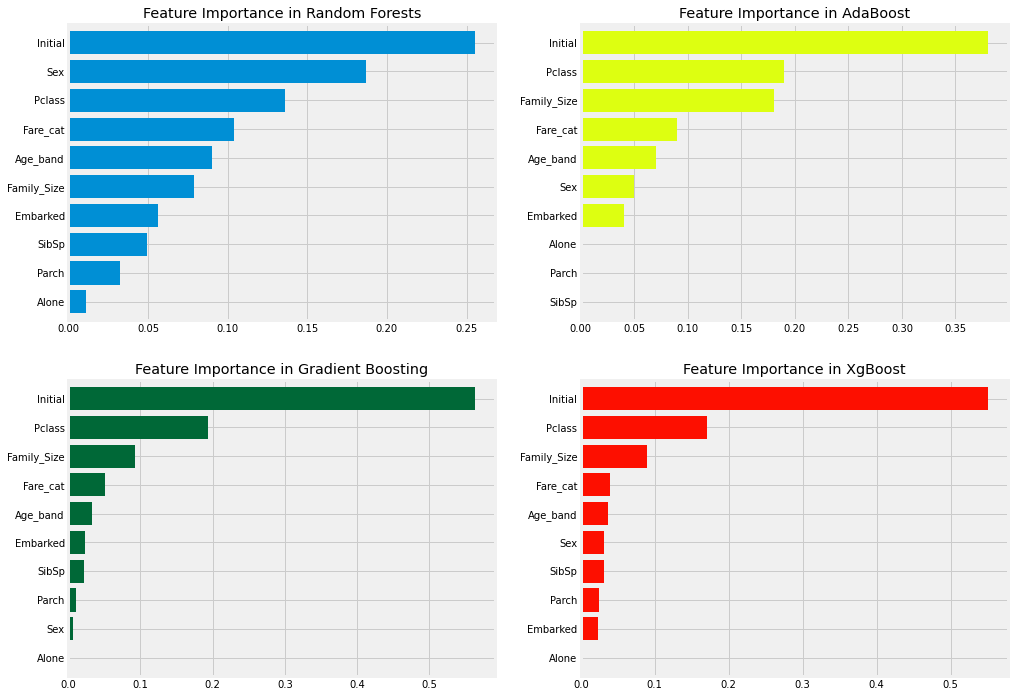

In [69]:
f, ax = plt.subplots(2,2,figsize=(15,12))

model = RandomForestClassifier(n_estimators=300, random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')

model = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0,1], color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')

model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1,0], cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')

model = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1,1], color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')

plt.show()

We can see the important features for various classifiers like RandomForests, AdaBoost,etc.

#### Observations:
1)공통적으로 중요한 feature는 Initial ,Fare_cat, Pclass, Family_Size 입니다.

2)Sex 는 그렇게 중요도가 높지 않았는데, 앞선 분석에서 Pclass와 함께 보았을 때 성별이 중요한 요소였던 것을 생각하면 놀라운 결과입니다.
성별은 Random Forest 모델에서만 중요해보입니다.

하지만 많은 분류기의 최상단에 있는 Initial은 Sex과 양의 상관관계에 있습니다. 결국, 두 정보 모두 성별에 대한 정보를 담고 있습니다.

3)이와 비슷하게 Pclass와 Fare_cat 모두 탑승객의 지위와 Family_Size, Alone, Parch, SibSp의 정보를 담고 있습니다.

<br>

I hope all of you did gain some insights to Machine Learning. Some other great notebooks for Machine Learning are: 1) For R:Divide and Conquer by Oscar Takeshita

2)For Python:Pytanic by Heads and Tails

3)For Python:Introduction to Ensembling/Stacking by Anisotropic

Thanks a lot for having a look at this notebook. If you found this notebook useful, Do Upvote.